# Transposition, a bio-inspired operator

This notebook is based on the algorithms stored in `evol_algorithm.py` file.

## Evolutionary Algorithm

We run an evolutionary algorithm and evaluate the performance for two different recombination operator: Uniform Crossover and Transposition.

In [1]:
from evol_algorithm import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Runs

We use two different functions to test our algorithm: rastrigin function and schwewfel function-

For some parameters we use the same value for all the runs, so we define them before running the evolutionary algorithms. Furthermore we use the same population for every run.

**PARAMETERS:**

In [2]:
numb_runs = 30
numb_generations = 300
size_pop = 200
prob_mut = 0.02
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02
dimensions = 20
precision = 3

## RASTIRIGIN FUNCTION

In [5]:
# problem dependent parameters
max_domain = 5.12
filename = 'rastrigin_crossover_D'+str(dimensions)+'_pop'+str(size_pop)
fitness = fit_rastrigin(dimensions, precision)
mutation = muta_bin(max_domain, dimensions, precision)

'''
Return population from file
'''
pop_init = read_init_pop('Initial_populations/pop_rastrigin_D'+str(dimensions)+'_pop'+str(size_pop)+'.dat')

**CROSSOVER**

We first define the problem dependent parameters and generate the initial population in order to have the same initial conditions.

In [6]:
%%time

recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 4h 10min 42s, sys: 4.43 s, total: 4h 10min 47s
Wall time: 4h 44min 18s


**TRANSPOSITION**

In [5]:
%%time

flank_size = [12]

for f_s in flank_size:
    filename = 'rastrigin_transposition_'+str(f_s)+'_D'+str(dimensions)
    recombination = transposition(f_s)
    run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 2h 32min 31s, sys: 3.45 s, total: 2h 32min 35s
Wall time: 2h 32min 55s


- - - - - -

## SCHWEFEL FUNCTION

In [10]:
dimensions = 15
size_pop = 100

**CROSSOVER**

In [11]:
# problem dependent parameters
max_domain = 500
filename = 'schwefel_crossover_D'+str(dimensions)+'_pop'+str(size_pop)
fitness = fit_schwefel(dimensions, precision)
mutation = muta_bin(max_domain, dimensions, precision)

'''
Return population from file
'''
pop_init = read_init_pop('Initial_populations/pop_schwefel_D'+str(dimensions)+'_pop'+str(size_pop)+'.dat')

In [5]:
%%time

recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 19min 25s, sys: 3.96 s, total: 19min 29s
Wall time: 19min 41s


**TRANSPOSITION**

In [ ]:
%%time

flank_size = [3]

for f_s in flank_size:
    filename = 'schwefel_transposition_'+str(f_s)+'_D'+str(dimensions)
    recombination = transposition(f_s)
    run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

---

## QUARTIC FUNCTION

In [3]:
dimensions = 15

**CROSSOVER**

In [4]:
# problem dependent parameters
max_domain = 1.28
filename = 'quartic_crossover_D'+str(dimensions)+'_pop'+str(size_pop)
fitness = fit_schwefel(dimensions, precision)
mutation = muta_bin(max_domain, dimensions, precision)

'''
Return population from file
'''
pop_init = read_init_pop('Initial_populations/pop_quartic_D'+str(dimensions)+'_pop'+str(size_pop)+'.dat')

In [5]:
%%time

recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 19min 25s, sys: 3.96 s, total: 19min 29s
Wall time: 19min 41s


**TRANSPOSITION**

In [ ]:
%%time

flank_size = [3, 6, 9, 12, 15]

for f_s in flank_size:
    filename = 'schwefel_transposition_'+str(f_s)+'_D'+str(dimensions)
    recombination = transposition(f_s)
    run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

---

---

## RASTRIGIN DIMENSION 12

(0, 200)

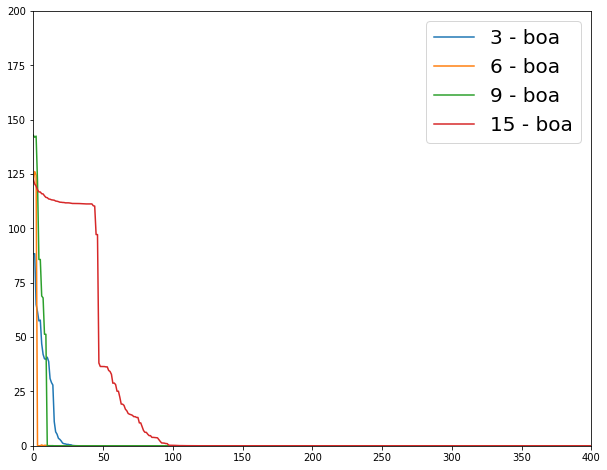

In [95]:
fs3 = get_data('Results/rastrigin_transposition_3.dat')
fs6 = get_data('Results/rastrigin_transposition_6.dat')
fs9 = get_data('Results/rastrigin_transposition_9.dat')
fs12 = get_data('Results/rastrigin_transposition_12.dat')
fs15 = get_data('Results/rastrigin_transposition_15.dat')
fs18 = get_data('Results/rastrigin_transposition_18.dat')

plt.rcParams["figure.figsize"] = (10,8)
plt.rc('legend',fontsize=20)

plt.plot(fs3[0], label='3 - boa')
#plt.plot(fs3[1], label='3 - ave')

plt.plot(fs6[0], label='6 - boa')
#plt.plot(fs6[1], label='6 - ave')

plt.plot(fs9[0], label='9 - boa')
#plt.plot(fs9[1], label='9 - ave')

plt.plot(fs15[0], label='15 - boa')
#plt.plot(fs15[1], label='15 - ave')


plt.legend()
plt.xlim(0,400)
plt.ylim(0,200)

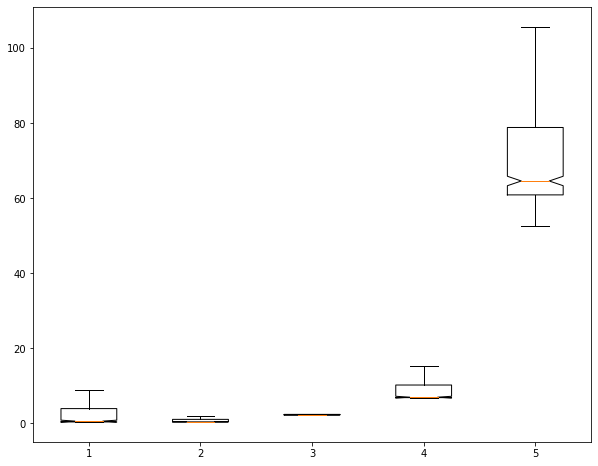

In [98]:
#plt.boxplot([fs3[0], fs6[0],fs9[0],fs12[0], fs15[0]], notch=True);
plt.boxplot([fs3[1], fs6[1], fs9[1], fs12[1], fs15[1]], notch=True, showfliers=False);


## RASTRIGIN DIMENSION 20

(0, 2)

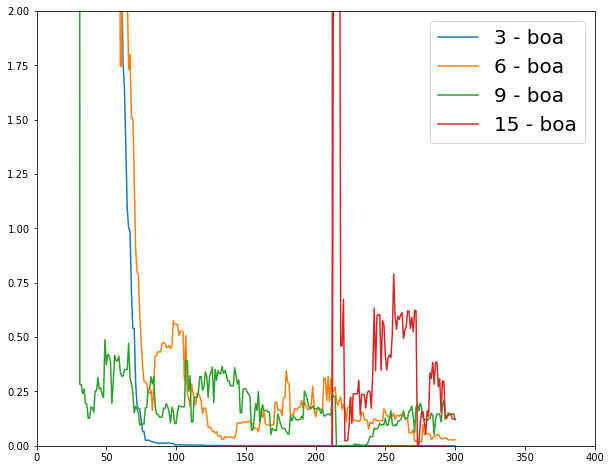

In [8]:
fs3 = get_data('Results/D20/rastrigin_transposition_3_D20.dat')
fs6 = get_data('Results/D20/rastrigin_transposition_6_D20.dat')
fs9 = get_data('Results/D20/rastrigin_transposition_9_D20.dat')
fs12 = get_data('Results/D20/rastrigin_transposition_12_D20.dat')
fs15 = get_data('Results/D20/rastrigin_transposition_15_D20.dat')

plt.rcParams["figure.figsize"] = (10,8)
plt.rc('legend',fontsize=20)

plt.plot(fs3[0], label='3 - boa')
#plt.plot(fs3[1], label='3 - ave')

plt.plot(fs6[0], label='6 - boa')
#plt.plot(fs6[1], label='6 - ave')

plt.plot(fs9[0], label='9 - boa')
#plt.plot(fs9[1], label='9 - ave')

plt.plot(fs12[0], label='12 - boa')
#plt.plot(fs12[1], label='12 - ave')

plt.plot(fs15[0], label='15 - boa')
#plt.plot(fs15[1], label='15 - ave')


plt.legend()
plt.xlim(0,400)
plt.ylim(0,2)